In [3]:
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import operator
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
%matplotlib inline

In [2]:
t_file = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1', low_memory=False)

In [3]:
regions = list(set(t_file.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'lightsage', 'lightgray', 'navy']

## All the attacks on a WorldMap

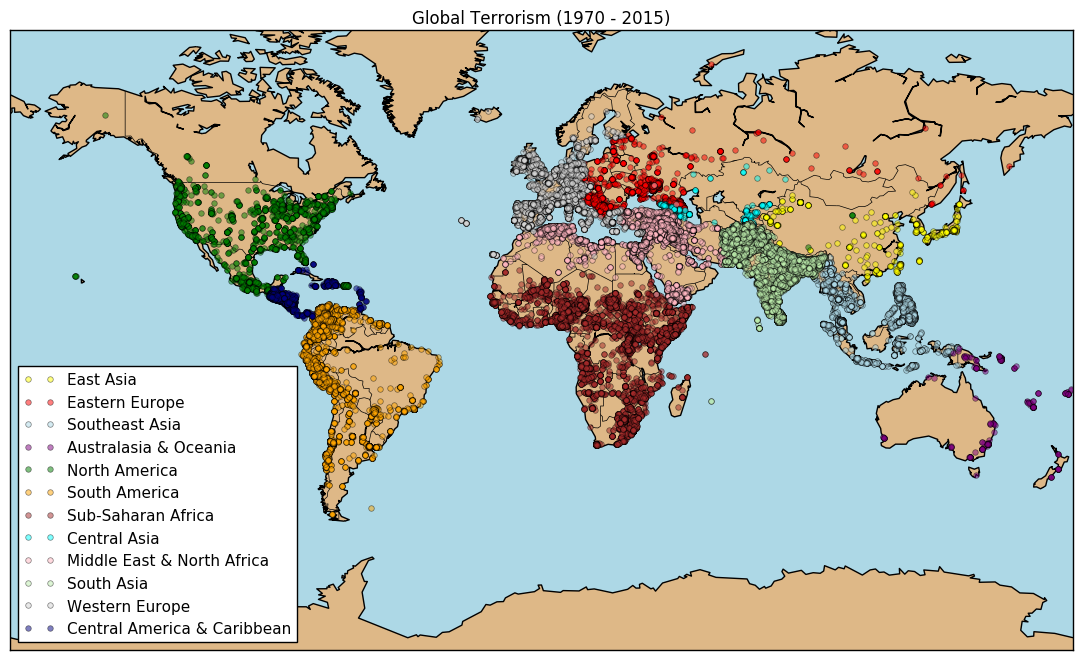

In [4]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(t_file.longitude[t_file.region_txt == region].astype("float")),\
            (list(t_file.latitude[t_file.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})

## Most popular terrorist nationality

(u'Iraq', 18285)


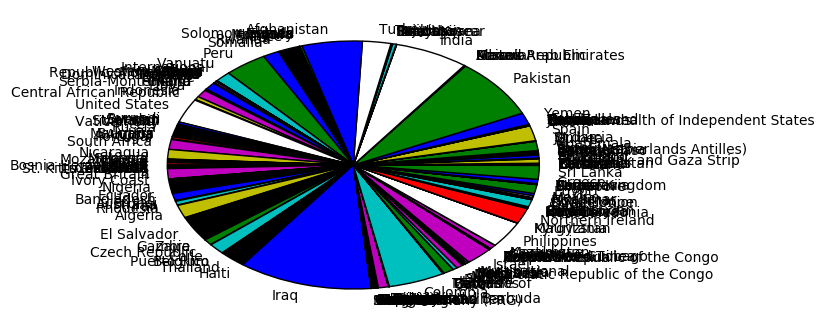

In [51]:
natdic = {}

for i in t_file['natlty1_txt']:
    natdic[i] = natdic.get(i, 1) + 1

plt.pie([v for v in natdic.values()], labels=[k for k in natdic.keys()],autopct=None)
print max(natdic.iteritems(), key=operator.itemgetter(1))

## Country with most frequent attack within a year

## Did the number of attacks increase per year?

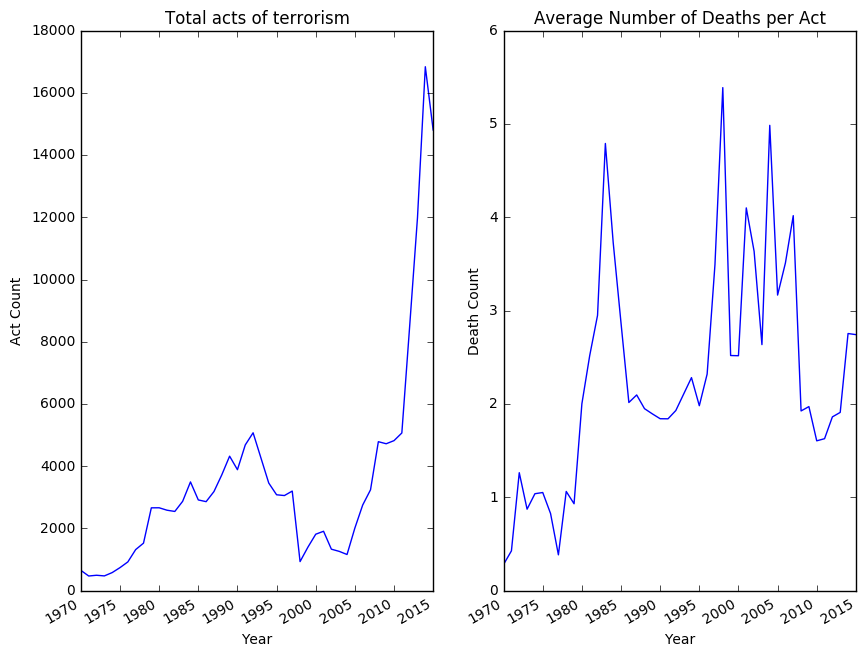

In [5]:
count_year = t_file.groupby(['iyear']).count()
mean_year = t_file.groupby(['iyear']).mean()

fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set(title = 'Total acts of terrorism', ylabel = 'Act Count', xlabel = 'Year')
ax1.plot(count_year.index, count_year.eventid)
ax2.set(title = 'Average Number of Deaths per Act', ylabel = 'Death Count', xlabel = 'Year')
ax2.plot(mean_year.index, mean_year.nkill)
fig.autofmt_xdate()

## Success rate of attacks

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



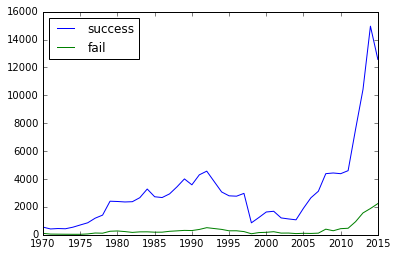

In [4]:
d = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',  
                usecols=[0, 1, 2, 3, 8, 11, 13, 14, 26, 29, 35, 37, 84, 100, 103]
               )

d = d.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'success':'success',
             'targtype1_txt':'target', 'targsubtype1_txt' : 'targetsub',
             'weaptype1_txt':'weapon', 'attacktype1_txt':'attack',
             'nkill':'fatalities', 'nwound':'injuries'})

d['fatalities'] = d['fatalities'].fillna(0).astype(int)
d['injuries'] = d['injuries'].fillna(0).astype(int)
d['day'][d.day == 0] = 1

d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month', 'year']])

success_counts=d[d.success==1]['year'].value_counts().sort_index()
fail_counts=d[d.success==0]['year'].value_counts().sort_index()
plt.plot(success_counts,label="success")
plt.plot(fail_counts,label="fail")
plt.legend(loc=2)

## Success rate of attacks in Thailand

## Predict the future success rate

## Number of attacks in Thailand

In [5]:
dt = d[(d.country == 'Thailand')]
print len(dt), "total attacks" 
print len(dt) / (2015 - 1970.), "attacks per year on Average"

3338 total attacks
74.1777777778 attacks per year on Average


## Attack in Thailand with most killed

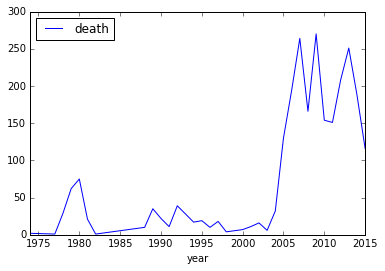

In [11]:
lst_per_year_thailand = []
for year in set(d.year):
    year_selector = d['year'] == year
    yo = d[year_selector]
    selector = yo['country'] == 'Thailand'
    yearkill = yo[selector]['fatalities'].sum()
    lst_per_year_thailand.append([year, yearkill])
    
lst_per_year_thailand_df = pd.DataFrame(lst_per_year_thailand, columns=['year','death'])
lst_per_year_thailand_df = lst_per_year_thailand_df[lst_per_year_thailand_df.death != 0]

lst_per_year_thailand_df.sort_values(['death', 'year'], ascending=[False, True]).head(5)
lst_per_year_thailand_df.plot(x='year',y='death')

## Safest countries

In [ ]:
# least attacks
# Is thailand safe?

## Are developed countries safer?

In [ ]:
# Come up with a list of developed countries and compare their attacks with developing
# Also see the most popular attack type or weapon type for developed vs developing 

## Most popular terrorist group (If any) and their biggest target

## Countries with most failed attacks

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Administrator\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



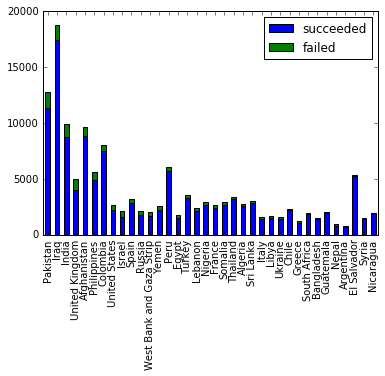

In [24]:
d['day'][d.day == 0] = 1
d['month'][d.month == 0] = 1
d['date'] = pd.to_datetime(d[['day', 'month','year']])
countbycountry = d[d.success == 1].groupby('country').count()['date']

df=pd.DataFrame(index=countbycountry[countbycountry>700].index.unique())
df["succeeded"] = d[d.success == 1].groupby('country').count()['date']
df["failed"]= d[d.success!= 1].groupby('country')['date'].count()
df[df.failed >0].sort_values(by='failed',ascending=False).plot(kind='bar', stacked= True)

In [80]:
terror_data = pd.read_csv('globalterrorismdb_0616dist.csv', encoding='ISO-8859-1',
                          usecols=[0, 1, 2, 3, 8, 11, 13, 14, 35, 84, 100, 103])
terror_data = terror_data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day',
             'country_txt':'country', 'provstate':'state', 'targtype1_txt':'target',
             'weaptype1_txt':'weapon', 'nkill':'fatalities', 'nwound':'injuries'})
terror_data['fatalities'] = terror_data['fatalities'].fillna(0).astype(int)
terror_data['injuries'] = terror_data['injuries'].fillna(0).astype(int)

terror_usa = terror_data[(terror_data.country == 'United States') &
                         (terror_data.state != 'Puerto Rico') &
                         (terror_data.longitude < 0)]
terror_usa['day'][terror_usa.day == 0] = 1
terror_usa['date'] = pd.to_datetime(terror_usa[['day', 'month', 'year']])

terror_usa = terror_usa[['id', 'date', 'year', 'state', 'latitude', 'longitude',
                         'target', 'weapon', 'fatalities', 'injuries']]
terror_usa = terror_usa.sort_values(['fatalities', 'injuries'], ascending = False)
terror_usa = terror_usa.drop_duplicates(['date', 'latitude', 'longitude', 'fatalities'])

C:\Users\sanch\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\sanch\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## Terrorist attacks by Weapon Type in the US

In [37]:
weapon_codes = []

for attack in terror_usa['weapon'].values:
    if attack in ['Explosives/Bombs/Dynamite', 'Sabotage Equipment']:
        weapon_codes.append(1)
    elif attack == 'Incendiary':
        weapon_codes.append(2)
    elif attack in ['Firearms', 'Fake Weapons']:
        weapon_codes.append(3)
    elif attack == 'Melee':
        weapon_codes.append(5)
    elif attack == 'Biological':
        weapon_codes.append(6)
    elif attack in ['Chemical', 'Radiological']:
        weapon_codes.append(7)
    elif 'Vehicle' in attack:
        weapon_codes.append(8)
    else:
        weapon_codes.append(4)

terror_usa['weapon'] = weapon_codes
weapon_categories = ['Explosives', 'Flammables', 'Firearms', 'Miscellaneous',
                     'Knives', 'Bacteria/Viruses', 'Chemicals', 'Vehicles']

# terrorist attacks by weapon
weapon_count = np.asarray(terror_usa.groupby('weapon').weapon.count())
weapon_percent = np.round(weapon_count / sum(weapon_count) * 100, 2)

# terrorist attack fatalities by weapon
weapon_fatality = np.asarray(terror_usa.groupby('weapon')['fatalities'].sum())
weapon_yaxis = np.asarray([1.93, 1.02, 2.28, 0.875, 0.945, 0.83, 0.835, 3.2])

# terrorist attack injuries by weapon
weapon_injury = np.asarray(terror_usa.groupby('weapon')['injuries'].sum())
weapon_xaxis = np.log10(weapon_injury)

weapon_text = []
for i in range(0, 8):
    weapon_text.append(weapon_categories[i] + ' (' + weapon_percent[i].astype(str) 
                       + '%)<br>' + weapon_fatality[i].astype(str) + ' Killed, '
                       + weapon_injury[i].astype(str) + ' Injured')

weapon_fatality[6] = 7
    
data = [go.Scatter(
        x = weapon_injury,
        y = weapon_fatality,
        text = weapon_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = (weapon_count + 50) / 10,
            opacity = 0.9,
            color = 'rgb(240, 140, 45)')
        )]

layout = go.Layout(
         title = 'Terrorist Attacks by Weapon in United States (1970-2015)',
         xaxis = dict(
             title = 'Injuries',
             type = 'log',
             range = [0.45, 3.51],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Fatalities',
             type = 'log',
             range = [0.65, 3.33],
             tickmode = 'auto',
             nticks = 3,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 8):
    annotations.append(dict(x=weapon_xaxis[i], y=weapon_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=weapon_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data, layout = layout)
iplot(figure)

## Terrorist attacks by targets in the US

In [38]:
# terrorist attack targets grouped in categories
target_codes = []

for attack in terror_usa['target'].values:
    if attack in ['Business', 'Journalists & Media', 'NGO']:
        target_codes.append(1)
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        target_codes.append(2)
    elif attack == 'Abortion Related':
        target_codes.append(4)
    elif attack == 'Educational Institution':
        target_codes.append(5)
    elif attack == 'Police':
        target_codes.append(6)
    elif attack == 'Military':
        target_codes.append(7)
    elif attack == 'Religious Figures/Institutions':
        target_codes.append(8)
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        target_codes.append(9)
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        target_codes.append(10)
    else:
        target_codes.append(3)

terror_usa['target'] = target_codes
target_categories = ['Business', 'Government', 'Individuals', 'Healthcare', 'Education',
                     'Police', 'Military', 'Religion', 'Transportation', 'Infrastructure']

# terrorist attacks by target
target_count = np.asarray(terror_usa.groupby('target').target.count())
target_percent = np.round(target_count / sum(target_count) * 100, 2)

# terrorist attack fatalities by target
target_fatality = np.asarray(terror_usa.groupby('target')['fatalities'].sum())
target_yaxis = np.asarray([1.33, 2.36, 2.98, 0.81, 1.25, 1.71, 1.31, 1.53, 1.34, 0])

# terrorist attack injuries by target
target_injury = np.asarray(terror_usa.groupby('target')['injuries'].sum())
target_xaxis = np.log10(target_injury)

target_text = []
for i in range(0, 10):
    target_text.append(target_categories[i] + ' (' + target_percent[i].astype(str) 
                       + '%)<br>' + target_fatality[i].astype(str) + ' Killed, '
                       + target_injury[i].astype(str) + ' Injured')

data = [go.Scatter(
        x = target_injury,
        y = target_fatality,
        text = target_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = target_count / 6.5,
            opacity = 0.9,
            color = 'rgb(240, 140, 45)')
        )]

layout = go.Layout(
         title = 'Terrorist Attacks by Target in United States (1970-2015)',
         xaxis = dict(
             title = 'Injuries',
             type = 'log',
             range = [1.36, 3.25],
             tickmode = 'auto',
             nticks = 2,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Fatalities',
             type = 'log',
             range = [0.59, 3.45],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 10):
    annotations.append(dict(x=target_xaxis[i], y=target_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=target_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data, layout = layout)
iplot(figure)

## Popular attack types back then vs now

## Popular attack types in the future(?)

## Most succesful terrorist

## Are we in peace now?